In [1]:
#pip install ypstruct

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
#from ypstruct import struct

In [3]:
''' Esta classe permite armazenar uma quantidade arbitrária de variáveis 
    como atributos, semelhante ao tipo struct do matlab 
    Também existe a classe ypstruct do pacote struct, mas a class a baixo se mostra
        muito rápida na iteração entre os vetores'''
class structtype():
    pass

In [4]:
img1 = cv2.imread('figs/lena.png',cv2.IMREAD_GRAYSCALE)

In [5]:
def convertVarFeat(img):
    data = structtype()
    data.img = np.array(img)
    data.imgSize = structtype()
    data.imgSize.lin, data.imgSize.col = data.img.shape
    
    return data

In [6]:
def calcHistogram(dados):
    dt = dados.img

    size = structtype()
    size.dt = structtype()
    size.dt.lin, size.dt.col = dt.shape

    if dt.dtype == 'uint8':
        buffer = np.zeros((256))

    ## Read the intire matrix element-by-element:
    for j in range((0), size.dt.lin):
        for k in range((0), size.dt.col):
            buffer[(dt[j,k])] += 1

    return buffer

In [7]:
def eqHistogram(Image):
    dt = Image.img

    size = structtype()
    size.dt = structtype()
    size.dt.lin, size.dt.col = dt.shape

    newDt = np.zeros((size.dt.lin, size.dt.col))

    for j in range((0), size.dt.lin):
        for k in range((0), size.dt.col):
            newDt[j, k] = np.ceil(255*(
                         (dt[j, k] - dt.min()) /
                         (dt.max() - dt.min())))

    newImage = np.uint8(newDt)

    return newImage

In [8]:
dados1 = convertVarFeat(img1)

In [9]:
newImage = eqHistogram(dados1)

In [10]:
dados2 = convertVarFeat(newImage)

In [11]:
newHist = calcHistogram(dados2)

Text(0.5, 1.0, 'Imagem equalizada')

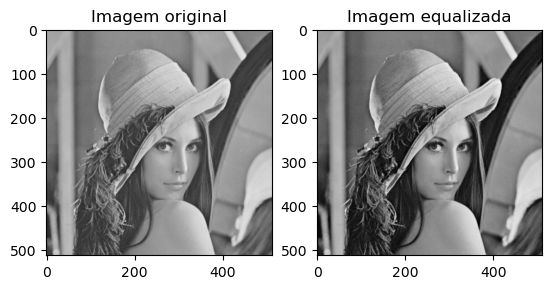

In [12]:
plt.figure(2)
plt.subplot(121), plt.imshow(img1, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Imagem original')
plt.subplot(122), plt.imshow(newImage, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Imagem equalizada')

In [13]:
plt.imsave(f"output/equalize_output_histogram_equalized.png",newImage, cmap='gray')

In [14]:
img2 = cv2.imread('./figs/lena20x20.png',cv2.IMREAD_GRAYSCALE)

In [15]:
dados2 = convertVarFeat(img2)

In [23]:
newHist1 = calcHistogram(dados2)

In [16]:
newImage2 = eqHistogram(dados2)

In [17]:
dados3 = convertVarFeat(newImage2)

In [18]:
newHist = calcHistogram(dados3)

In [19]:
sImg22 = np.array(img2)
cv2.imwrite(f"output/equalize_output_original_eye.png", sImg22)

True

Text(0.5, 1.0, 'Imagem equalizada')

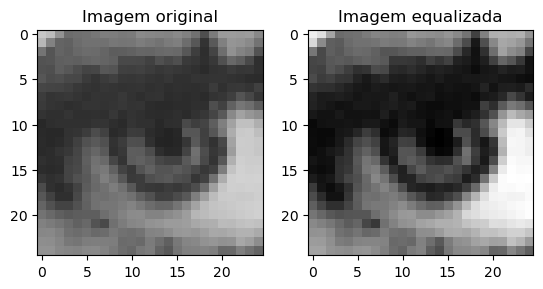

In [20]:
plt.figure(2)
plt.subplot(121), plt.imshow(img2, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Imagem original')
plt.subplot(122), plt.imshow(newImage2, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Imagem equalizada')

In [21]:
plt.imsave(f"output/equalize_output_histogram_equalized_eye.png",newImage2, cmap='gray')

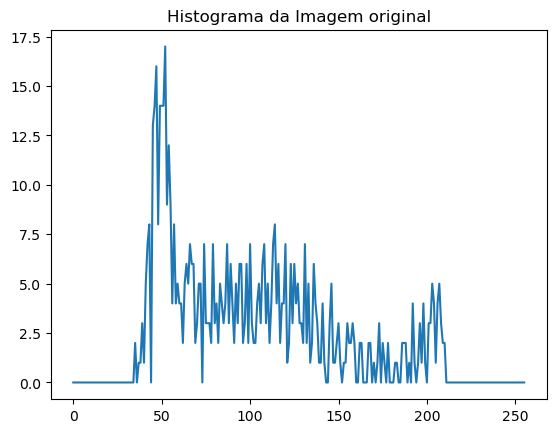

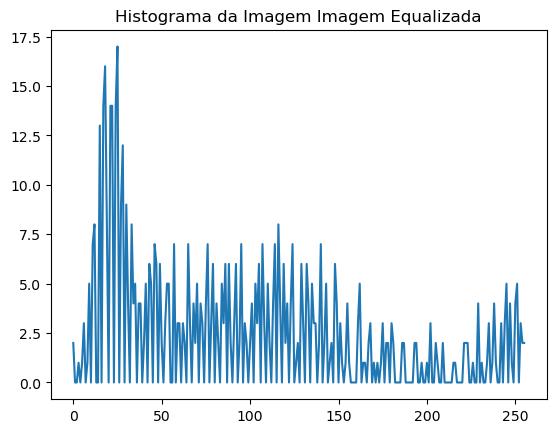

In [24]:
plt.figure(1)
plt.plot(newHist1)
plt.title('Histograma da Imagem original')
plt.figure(2)
plt.plot(newHist)
plt.title('Histograma da Imagem Imagem Equalizada')

plt.show()